In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def norm(x,p):
    if p=='inf':
        return np.max(np.abs(x))
    else:
        s = np.sum(np.abs(x)**p)
        return s**(1/p)

In [53]:
nd = 5
dvec = 2**np.linspace(2,nd,nd-1,dtype=np.int64)
dvec

array([ 4,  8, 16, 32], dtype=int64)

In [65]:
iter1 = 50
iter2 = 50
p = 1.01
q = p/(p-1)

nd = 8
dvec = 2**np.linspace(1,nd,nd-1,dtype=np.int64)
lend = nd-1

vals = np.zeros(lend)
for k in range(lend):

    d = dvec[k]

    curr = 0

    for i in range(iter1):
        ## define hyperplane
        v = np.random.normal(0,1,size=d)
        v = v/norm(v,2)
        vq = norm(v,q)

        for j in range(iter2):
            x = np.random.normal(0,1,size=d)

            # compute orthogonal projection
            y = np.dot(x,v)*v

            # measure Lp distance
            fake = norm(y,p)

            # measure true distance
            true = np.abs(np.dot(x,v))/vq

            if fake/true > curr:
                curr = fake/true
    vals[k] = curr

            

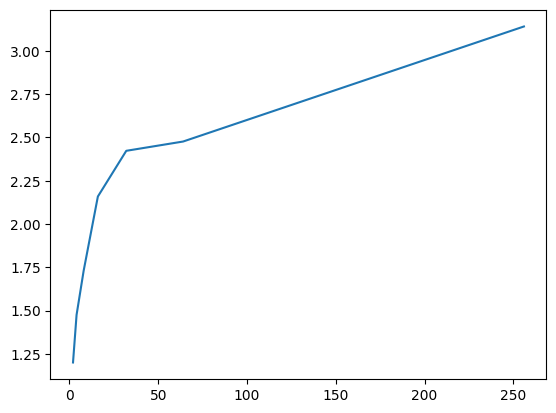

In [66]:
plt.plot(dvec,vals)

In [56]:
d = 100
k = 95
itera = 500
best = 0

best_list = []
for _ in range(itera):

    A = np.random.normal(size=(d,k))
    Ainv = np.linalg.inv(np.dot(A.T,A))
    Afull = np.dot(A,np.dot(Ainv,A.T))

    x = np.ones(d)
    best = max(best, norm(x-np.dot(Afull,x),'inf'))
    best_list.append(best)

print(best)

1.3959093062666375


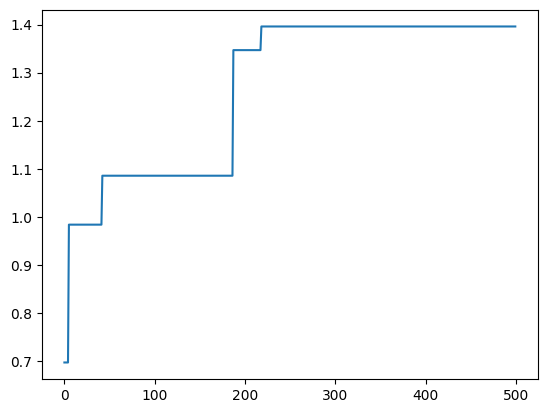

In [57]:
plt.plot(best_list)

In [18]:
Afull.shape

AttributeError: 'tuple' object has no attribute 'shape'